In [1]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 4.8MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
  [seaborn]
You must restart the runtime in order to use newly installed versions.


# Lecture 7: Runge-Kutta method

The [Runge-Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) works by interpolating between discretized time points to (typically) better estimate the change in a function as the independent variable(s) change. Standard numerical routines often use a fourth-order approximation, but here we will follow the second order method. Given

$$ \frac{d x}{d t} = f(x, t)\,, $$

numerical integration of $x(t)$ by the second order Runge-Kutta method proceeds according to

$$
\begin{align} \begin{aligned}
k_1 &= \frac{\Delta t}{2} \; f(x, t)\,,\\
k_2 &= \Delta t \; f\left(x + k_1, t + \frac{\Delta t}{2}\right)\,,\\
x(t + \Delta t) &= x(t) + k_2\,. 
\end{aligned} \end{align}
$$

Let's write a function to numerically integrate a differential equation using the second order Runge-Kutta method.

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the integration function using the second order Runge-Kutta method below

def rk(f, x0, a, b, n):
  dt = (b-a)/float(n)
  t_values = np.arange(a, b+dt, dt)
  x_values = []
  
  x_current = x0
  for t in t_values:
    x_values.append(x_current)
    k1 = dt * f(x_current, t) / 2
    k2 = dt * f(x_current + k1, t + 0.5*dt)
    x_current = x_current + k2
    
  return x_values, t_values

### Visualizing the Runge-Kutta method

To examine the output in a simple case, let's return to the differential equation

$$ \frac{dx}{dt} = -x^3 + 0.1\,$$

that we considered last time, starting again with the initial condition $x(0) = 0$. How does the result look as we change the number of steps?

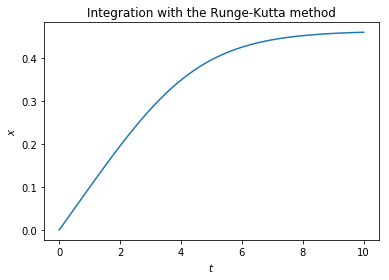

In [4]:
# Define the function and perform the integration

def f(x, t):
  return -x**3 + 0.1

x_vals, t_vals = rk(f, 0, 0, 10, 100)

sns.lineplot(t_vals, x_vals)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.title("Integration with the Runge-Kutta method");

### Applying the Runge-Kutta method to a real example

This problem is taken from exercise 8.1 in Newman's *[Computational Physics](http://www-personal.umich.edu/~mejn/cp/)* textbook. Consider the following electrical circuit.

<img src="https://github.com/Physics177-2019/lecture-7/blob/master/lowpass.png?raw=1" width="400"/>

Assuming that the output load has high impedance, so that current flow out can be neglected, we have the following dynamics for this system,

$$ 
\begin{align} \begin{aligned}
I R &= V_{in} - V_{out}\,,\\
Q   &= C V_{out}\,,\\
I   &= \frac{d Q}{d t}\,. 
\end{aligned} \end{align}
$$

These expressions simplify to

$$ \frac{d V_{out}}{d t} = \frac{1}{RC} \left(V_{in} - V_{out}\right)\,. $$

Let's define a function to generate a square wave for the input voltage.

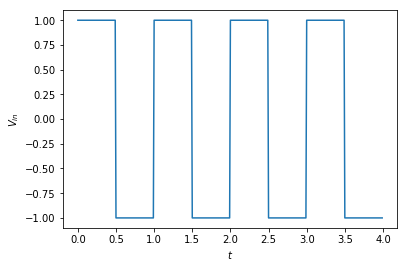

In [5]:
def v_in(t):
    return 1 - ( 2 * (np.floor(2*t)%2) )

t = np.arange(0, 4, 0.01)
sns.lineplot(t, v_in(t))
plt.xlabel(r'$t$')
plt.ylabel(r'$V_{in}$');

**Exercise**: Using the Runge-Kutta method, make plots of the output voltage, starting with $V_{out}=0$, from $t=0$ to $t=5$ with this input function and with $RC = 0.01$, $0.1$, $1$, and $10$. Note that the value of $\Delta t$, or equivalently the number of steps to use, might need to be chosen carefully.

This circuit is a type of low-pass filter. Based on your plots, does the name make sense?

*Hint*: What units does $RC$ have? You can see this from the differential equation above.

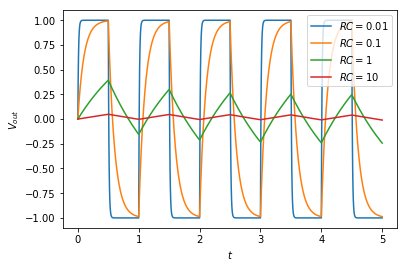

In [6]:
# Set up the integral using different values of RC

RC_values = [0.01, 0.1, 1, 10]

t_arrays = [] # Fill this in (using the loop below)!
v_arrays = [] # Generate this (using the loop below)!

# To fill in the arrays, it might be helpful to iterate over the RC values
for rc in RC_values:

    # You might also redefine the derivative of V_out here
    def dv_out(v, t):
        return (v_in(t) - v) / rc # Something here
      
    v_vals, t_vals = rk(dv_out, 0, 0, 5, 1000)
    
    t_arrays.append(t_vals)
    v_arrays.append(v_vals)

# Plot the output

sns.lineplot(t_arrays[0], v_arrays[0], label=r'$RC = 0.01$')
sns.lineplot(t_arrays[1], v_arrays[1], label=r'$RC = 0.1$')
sns.lineplot(t_arrays[2], v_arrays[2], label=r'$RC = 1$')
sns.lineplot(t_arrays[3], v_arrays[3], label=r'$RC = 10$')

plt.xlabel(r'$t$')
plt.ylabel(r'$V_{out}$');